# 모수적 검정_t검정

## 목적
- 통계적 가설검정 중 가장 많이 쓰이는 t검정을 파이썬 코드로 실습해보고자 한다. 
- 평균의 차이를 검정하는 z검정은 모분산을 알아야 하기 때문에, 실제로는 많이 쓰이지 못하고, 모분산을 모르는 상황 그리고 샘플이 30개 미만인 상황에서 t검정을 사용할 수 있다.
- t검정의 목적 또한 표본의 평균의 차이가 있는지를 보기 위함이다. 
- 3가지 유형의 문제가 나올 수 있다. 
    - 첫번째, 단일 표본에서 알려진 평균과 샘플의 평균이 일치하는지 
    - 두번째, 단일 표본에서 사건(or 실험) 전,후 쌍의 데이터가 있을 때, 평균이 일치하는지
    - 세번째, 두 표본의 평균의 차이가 있는지
        - 분산이 동일한 경우
        - 분산이 동일하지 않는 경우

## Content
- 1. 단일 표본
- 2. 단일 표본의 전,후 쌍의 데이터
- 3. 두 표본 
    - 3-1. 분산이 동일한 경우
    - 3-2. 분산이 동일하지 않은 경우

In [1]:
# library
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# data
# 학생 정보 데이터 
data = pd.read_csv('students.csv')

In [4]:
data.head(3)

,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
0,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
1,898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
2,379678,"Williams, Hanh",Female,22,168,70.6,Protestant,1.24,3rd,Social Sciences,Mathematics and Statistics,45.0,46.0,0,0,NaN


# 1. 단일표본
- 문제 : 학생의 몸무게는 70kg으로 알려져 있다. 9명의 학생을 뽑은 데이터가 있고 유의수준 0.05로 t검정으로 양측 검정하라.

- 가설 
    - H0: 학생의 평균 몸무게는 알려진 70kg과 차이가 없다.
    - H1: 학생의 평균 몸무게는 알려진 70kg과 차이가 있다. 

In [6]:
# 모평균
mu = 70
# 유의수준
alpha = 0.05 
# 표본의 수 
n = 9

In [7]:
# 샘플
np.random.seed(7)
sample_data = data['weight'].sample(n)

In [30]:
## 표본의 통계량 
# 표본의 평균
x_bar = np.mean(sample_data)
print('표본의 평균 : {:.2f} kg'.format(x_bar))
# 표본의 표분편차
s = np.std(sample_data, ddof=1)
# t 통계량 
t = (x_bar - mu) / (s/np.sqrt(n))
print('t통계량 : {0:.2f}'.format(t))

표본의 평균 : 74.70 kg
t통계량 : 1.19


In [25]:
## 극단의 확율 : 극단의 확율은 양측 검정인 경우 2배 하고, 유의 수준과 비교해야한다. 
# 자유도
DF = n-1
# t분포는 자유도에 따라 분포가 달라진다. 
1-stats.t(DF).cdf(t)

0.1345731072876939

In [31]:
## 95% 신뢰구간 
lower_bound = x_bar + stats.t(DF).ppf(0.025)*(s/np.sqrt(n))
upper_bound = x_bar + stats.t(DF).ppf(0.975)*(s/np.sqrt(n))

print('모평균의 신뢰구간은 {0:.2f}부터 {1:.2f}까지 이다.'.format(lower_bound, upper_bound))

모평균의 신뢰구간은 65.57부터 83.83까지 이다.


In [21]:
# stats 활용한 p-value approach
stats.ttest_1samp(sample_data, mu, alternative='two-sided')

Ttest_1sampResult(statistic=1.1873500024696864, pvalue=0.2691462145753879)

## 해석 
- 1. 표본의 통계량 : 통계량 1.19로 1.96보다 작기 때문에 귀무가설을 채택한다. 알려진 몸무게 70kg과 차이가 없다. 
- 2. p-value : 양극단의 확율은 0.269로 유의수준 0.05보다 크기 때문에 귀무가설을 채택한다. 알려진 몸무게 70kg과 차이가 없다.
- 3. 신뢰구간 : 모평균의 신뢰구간은 65.57부터 83.83으로 표본의 평균 70은 모평균의 신뢰구간안에 존재하므로 알려진 몸무게 70kg과 차이가 없다.

# 2. 단일표본의 전, 후 쌍의 데이터

- 문제 : 동일한 표본의 실험 전/후의 평균의 차이가 있는가
- 가설 
    - H0 : before 와 after의 평균의 차이가 0과 차이가 없다. 
    - H1 : before 와 after의 평균의 차이가 0과 차이가 있다.

In [16]:
# data
before = [0.430,0.266,0.567,0.531,0.707,0.716,0.651,0.589,0.469,0.723]
after = [0.415,0.238,0.390,0.410,0.605,0.609,0.632,0.523,0.411,0.612]

data2 = pd.DataFrame(columns=['before','after'])

data2['before'] = before
data2['after'] = after

data2.head()

,before,after
0,0.430,0.415
1,0.266,0.238
2,0.567,0.390
3,0.531,0.410
4,0.707,0.605


In [17]:
data2['diff'] = data2['before'] - data2['after']

In [20]:
# 모평균
mu = 0 
# 표본의 평균 
x_bar = data2['diff'].mean()
# 표본의 표준편차
s = np.std(data2['diff'], ddof=1)
# 표본의 수
n= len(data2)
# 자유도
DF = n-1
# t 통계량 
t = (x_bar - mu) / (s/np.sqrt(n))
print('t통계량 : {0:.2f}'.format(t))

t통계량 : 4.86


In [23]:
# p-value , 양측검정 
# 극단의 확율의 두배 
2*(1-stats.t(DF).cdf(t))

0.000891115457822611

In [24]:
## 95% 신뢰구간 
lower_bound = x_bar + stats.t(DF).ppf(0.025)*(s/np.sqrt(n))
upper_bound = x_bar + stats.t(DF).ppf(0.975)*(s/np.sqrt(n))

print('모평균의 신뢰구간은 {0:.2f}부터 {1:.2f}까지 이다.'.format(lower_bound, upper_bound))

모평균의 신뢰구간은 0.04부터 0.12까지 이다.


In [19]:
# stats를 활용한 paired t-test , p-value approach
stats.ttest_rel(data2['before'], data2['after'], alternative='two-sided')

Ttest_relResult(statistic=4.863812745135183, pvalue=0.0008911154578225479)

## 해석

- 1. 표본의 통계량 : 통계량은 4.86으로 1.96보다 크기 때문에, 귀무가설을 기각한다. 따라서 before와 after의 평균의 차이가 0이 아니다. 
- 2. p-value : p-value는 0.00089로 유의수준 0.05보다 작기 때문에, 귀무가설을 기각한다. 따라서 before와 after의 평균의 차이가 0이 아니다.
    - stats 모듈의 ttest_rel로 paired 데이터의 차이를 바로 검정할 수 있고, 통계량과 p-value가 계산되는 것을 확인할 수 있다. 
- 3. 신뢰구간 : 모평균의 신뢰구간은 0.04 부터 0.12까지로 0은 신뢰구간의 범위 밖에 있다. 따라서 before와 after의 평균의 차이가 0이 아니다. 

## 3. 두 표본

### 3-1. 두 표본의 분산이 같은 경우

- 문제 : 학생의 데이터 중 남성과 여성의 salary의 차이가 있는가
- 가설 
    - H0 : 학생 중 남성과 여성의 salary의 평균의 차이가 없다. 
    - H1 : 학생 중 남성과 여성의 salary의 평균의 차이가 있다.

In [29]:
data.head(3)

,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
10,200803,"Lang, Mackenzie",Female,22,162,66.8,Other,1.04,4th,Economics and Finance,Environmental Sciences,62.0,61.0,1,1,45254.10802
12,354271,"Covar Orendain, Christopher",Male,23,185,84.6,Orthodox,1.00,4th,Environmental Sciences,Mathematics and Statistics,71.0,76.0,1,1,40552.79024
13,317812,"Lopez, Monique",Female,20,158,64.4,Catholic,2.50,6th,Environmental Sciences,Social Sciences,66.0,70.0,1,1,27007.03029


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753 entries, 10 to 8238
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   stud.id          1753 non-null   int64  
 1   name             1753 non-null   object 
 2   gender           1753 non-null   object 
 3   age              1753 non-null   int64  
 4   height           1753 non-null   int64  
 5   weight           1753 non-null   float64
 6   religion         1753 non-null   object 
 7   nc.score         1753 non-null   float64
 8   semester         1753 non-null   object 
 9   major            1753 non-null   object 
 10  minor            1753 non-null   object 
 11  score1           1753 non-null   float64
 12  score2           1753 non-null   float64
 13  online.tutorial  1753 non-null   int64  
 14  graduated        1753 non-null   int64  
 15  salary           1753 non-null   float64
dtypes: float64(5), int64(5), object(6)
memory usage: 232.8+ KB


In [31]:
# 결측치 제거
data.dropna(axis=0, inplace=True)

In [32]:
# 남성과 여성 데이터 나누기 
male = data[data['gender'] == 'Male']
female = data[data['gender'] == 'Female']

In [34]:
# 샘플의 수 50 뽑기
n = 50 
np.random.seed(7)
male_sample = male.sample(n)
female_sample = female.sample(n)

In [37]:
# 두 표본의 분산의 차이가 있는가
male_std = male_sample['salary'].std(ddof=1)
female_std = female_sample['salary'].std(ddof=1)

print('남성의 salary의 표준편차 : {:.2f}'.format(male_std))
print('여성의 salary의 표준편차 : {:.2f}'.format(female_std))

남성의 salary의 표준편차 : 8440.59
여성의 salary의 표준편차 : 6797.24


### 등분산 테스트 
- 가설 
    - H0:분산의 차이가 없다.
    - H1:분산의 차이가 있다. 
- 등분산 테스트 (bartlett test) 결과 p-value가 0.05이상으로 분산의 차이가 없다.

In [39]:
# 등분산 테스트 bartlett 
stats.bartlett(male_sample['salary'], female_sample['salary'])

BartlettResult(statistic=2.256733104733113, pvalue=0.1330344430032842)

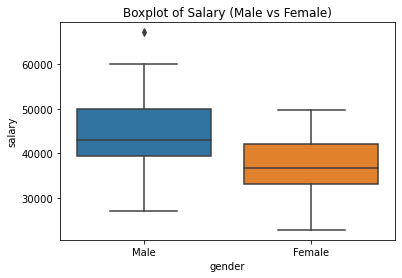

In [38]:
# 두 표본의 분포 시각화 (차이 확인) 
sample_data = pd.concat([male_sample, female_sample])
sns.boxplot(x = 'gender', y = 'salary', data= sample_data)
plt.title('Boxplot of Salary (Male vs Female)')
plt.show()

In [41]:
# t-test 두 표본, 등분산 case
stats.ttest_ind(male_sample['salary'], female_sample['salary'],
                equal_var=True,
               alternative='two-sided')

Ttest_indResult(statistic=5.020890200237071, pvalue=2.305598726659006e-06)

### 해석
- 1. 통계량 : 양측 검정 유의수준 0.05 수준으로 통계량이 5.02로 1.96보다 크기 때문에 가설을 기각하고, 두 표본(남성, 여성)의 salary의 평균의 차이가 있다. 
- 2. p-value : 양측 검정 유의수준 0.05 수준으로 p-value가 0.0000023으로 0.05보다 작기 때문에, 두 표본(남성, 여성)의 salary의 평균의 차이가 있다. 

## 3-2. 분산이 다른 경우

- 문제 : Economics and Finance 전공과 Social Sciences의 salary의 평균의 차이가 있는가?

In [44]:
data['major'].unique()

array(['Economics and Finance', 'Environmental Sciences',
       'Political Science', 'Mathematics and Statistics', 'Biology',
       'Social Sciences'], dtype=object)

In [53]:
EF = data[data['major'] == 'Economics and Finance']
SS = data[data['major'] == 'Social Sciences']

In [70]:
# 샘플의 수 50
n = 50
np.random.seed(770)
EF_sample = EF.sample(n)
SS_sample = SS.sample(n)

In [71]:
# 두 표본의 분산 확인
EF_std = EF_sample['salary'].std(ddof=1)
SS_std = SS_sample['salary'].std(ddof=1)

print('Economics and Finance 전공의 salary 의 분산은 {:.2f}'.format(EF_std))
print('Social Sciences 전공의 salary 의 분산은 {:.2f}'.format(SS_std))

Economics and Finance 전공의 salary 의 분산은 8468.87
Social Sciences 전공의 salary 의 분산은 6176.29


### 표본의 등분산성 확인
- 가설 
    - H0 : 두 표본의 분산의 차이가 없다.
    - H1 : 두 표본의 분산의 차이가 있다.  

In [72]:
# 표본의 등분산성 확인
stats.bartlett(EF_sample['salary'], SS_sample['salary'])

BartlettResult(statistic=4.755495438476728, pvalue=0.02920488422798071)

- 등분산성 테스트 (bartlett test) 결과 p-value가 0.029로 0.05보다 작기 때문에 귀무가설을 기각하고, 두 표본의 분산의 차이가 있다.

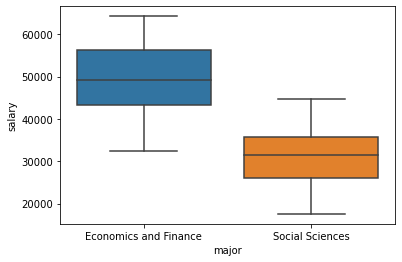

In [74]:
sample_data = pd.concat([EF_sample, SS_sample])
sns.boxplot(x= 'major', y='salary', data= sample_data)
plt.show()

In [73]:
stats.ttest_ind(EF_sample['salary'], SS_sample['salary'], equal_var=True,
               alternative='two-sided')

Ttest_indResult(statistic=12.217076318458023, pvalue=2.078832288905801e-21)

## 해석 
- 1. 통계량 : 통계량이 12.217로 유의수준 0.05에서 1.96보다 크기 때문에, Economics and finance 전공과 Social Science와의 salary의 평균의 차이가 있다.

- 2. p-value : 유의수준 0.05에서 양측검정으로 p-value가 매우 작기 때문에, 두 전공의 salary의 평균의 차이가 있다. 